# Prac Wk4: Linear and Logistic Regression

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Mount google colab to drive to access to the dataset
from google.colab import drive
drive.mount('/content/drive/')



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#Q1

a) Plotting f(x) = x^3 + 1 over [-1,1]


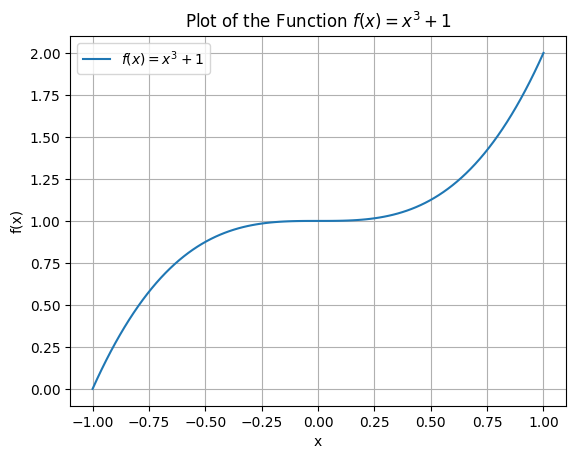

In [132]:
def f(x):
  return x ** 3 + 1

x = np.linspace(-1, 1, 100)
y = f(x)

plt.plot(x, y, label=r'$f(x) = x^3 + 1$')
plt.title('Plot of the Function $f(x) = x^3 + 1$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()




b) Create a “sample training set” of 30 points by generating a random set of x/input values, and then corresponding outputs by evaluating the true function at each input value and adding Gaussian random noise. Plot the data on the same axes as the function

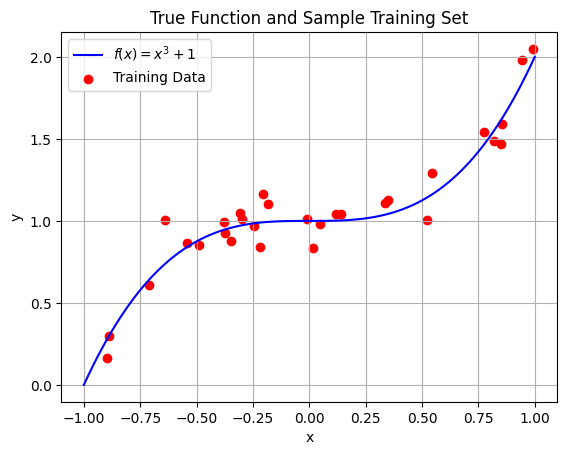

In [133]:
np.random.seed(50)
sample_training_x = np.random.uniform(-1, 1, 30)

noise = np.random.normal(0, 0.1, 30) # a little noise, make this std higher to make it more noisy
sample_training_y = f(sample_training_x) + noise

plt.plot(x, y, label=r'$f(x) = x^3 + 1$', color='blue')

# Plot the noisy data points
plt.scatter(sample_training_x, sample_training_y, color='red', label='Training Data')

# Add labels and legend
plt.title('True Function and Sample Training Set')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

c) Perform linear regression using your training set and calculate the training set (sum
of squares) error

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# reshape x into 2d vector (30,1)
sample_training_x = sample_training_x.reshape(-1, 1)

# linear regression model
model = LinearRegression()
model.fit(sample_training_x, sample_training_y)

#predict on training set
predictions = model.predict(sample_training_x)

# sse error
sse = np.sum((sample_training_y - predictions)**2)
print("Training SSE:", sse)

Training SSE: 1.0525306681147757


d) Perform polynomial regression using your training set and calculate the training set
(sum of squares) error. Experiment with different order polynomials and observe
the effect on the training set error

Polynomial Degree 0: SSE = 4.5992
Polynomial Degree 1: SSE = 1.0525
Polynomial Degree 2: SSE = 1.0420
Polynomial Degree 3: SSE = 0.2934
Polynomial Degree 5: SSE = 0.2563
Polynomial Degree 10: SSE = 0.2449


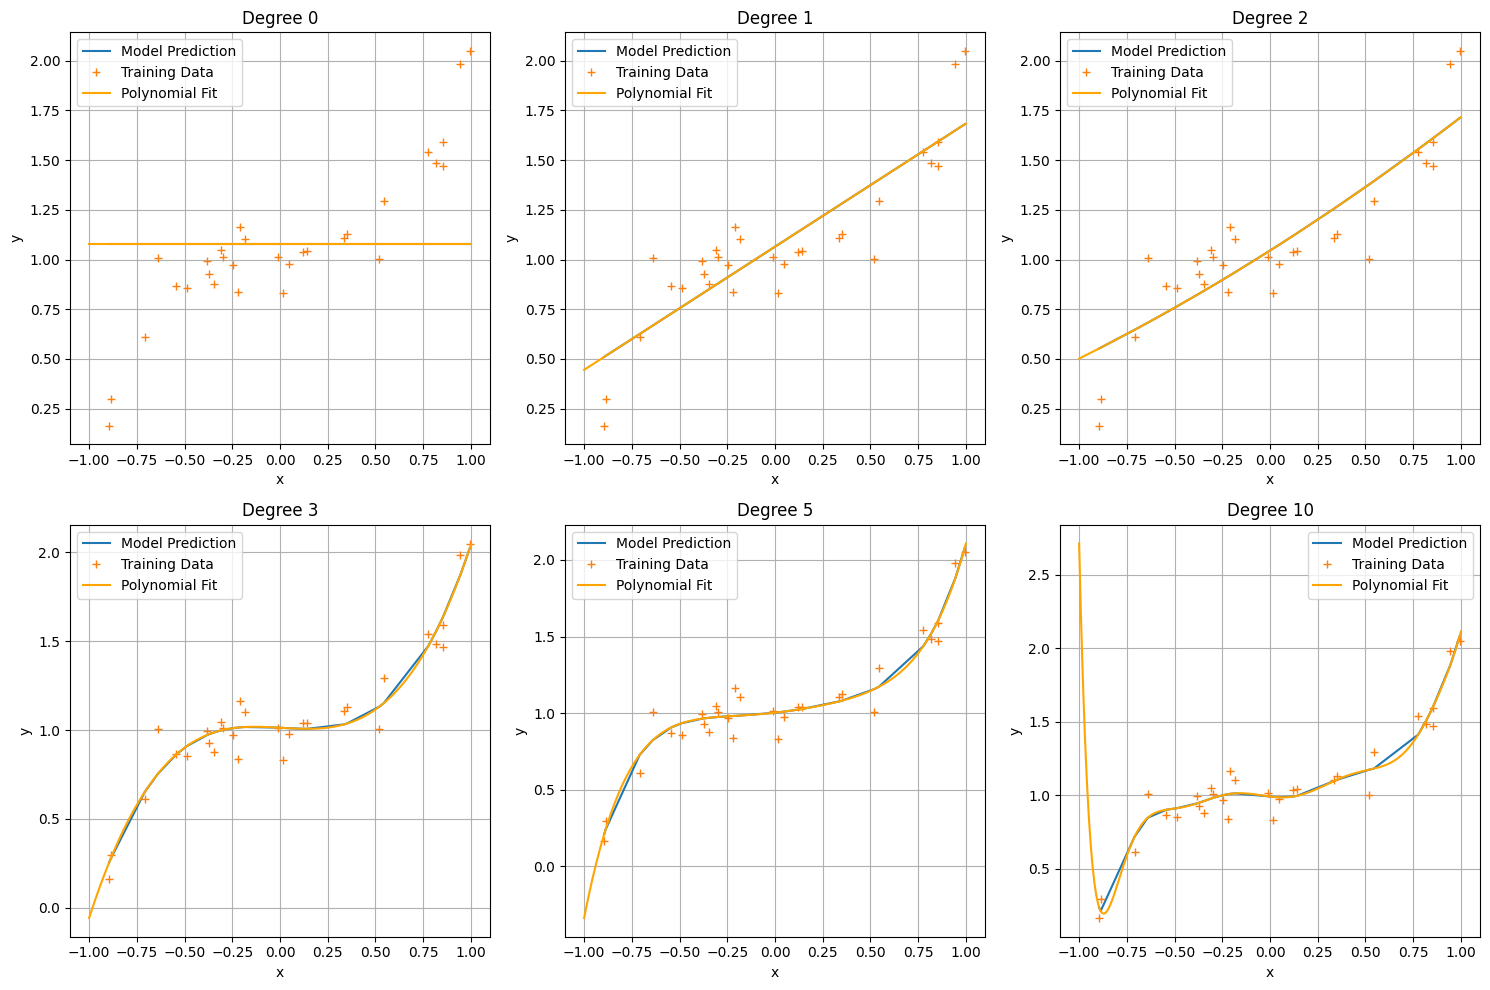

In [135]:
from sklearn.preprocessing import PolynomialFeatures

degrees = [0, 1, 2, 3, 5, 10] # try random degrees
plt.figure(figsize=(15, 10))
mses = []

for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(sample_training_x)

    model = LinearRegression()
    model.fit(x_poly, sample_training_y)

    predictions = model.predict(x_poly)
    sse = np.sum((sample_training_y - predictions) ** 2)
    print(f"Polynomial Degree {degree}: SSE = {sse:.4f}")
    mse = sse / len(sample_training_y)
    mses.append(mse)

    x_plot = np.linspace(-1, 1, 200).reshape(-1, 1)
    x_plot_poly = poly.transform(x_plot)
    y_plot = model.predict(x_plot_poly)

    # sort x_plot for smooth curves
    sorted_idx = sample_training_x[:, 0].argsort()
    sample_training_x_sorted = sample_training_x[sorted_idx]
    pred_y_sorted = predictions[sorted_idx]

    # plot
    plt.subplot(2, 3, i + 1)
    plt.plot(sample_training_x_sorted, pred_y_sorted, label='Model Prediction')
    plt.plot(sample_training_x, sample_training_y, '+', label='Training Data')
    plt.plot(x_plot, y_plot, color='orange', label='Polynomial Fit')
    plt.title(f'Degree {degree}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()



# lower degrees underfit (sse is high)
# higher degrees reduce sse but may be overfitting, 10 degree is overfitting and has poor generalisation performance, 3 is ok





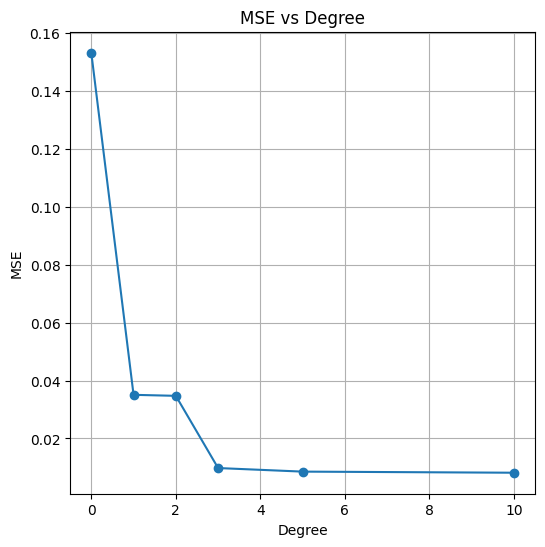

In [136]:
plt.figure(figsize=(6, 6))
plt.plot(degrees, mses, marker='o')
plt.title('MSE vs Degree')
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.grid(True)
plt.show()


#Q2

b) Fit a linear regression model to the data, using the final column (weight in kg) as
the output/target variable.

In [137]:
df = pd.read_csv('/content/drive/MyDrive/comp4702/pokemonregr.csv')

#checking for missing data
print("missing data:\n", df.isnull().sum()) #20 missing weights

# how much is that in a percentage?
print("\n % of missing data\n", df.isnull().sum() / len(df) * 100)

# 2.49% missing data is okay to drop, imputing with mean/median might introduce more bias esp if the missing data is missing for a reason or significantly different from the rest

df = df.dropna()

# define x and y
X_raw = df.drop(columns=['weight_kg']) # everything except weight
y = df['weight_kg'] #weight


model_raw = LinearRegression()
model_raw.fit(X_raw, y)



missing data:
 attack         0
defense        0
height_m      20
sp_attack      0
sp_defense     0
speed          0
weight_kg     20
dtype: int64

 % of missing data
 attack        0.000000
defense       0.000000
height_m      2.496879
sp_attack     0.000000
sp_defense    0.000000
speed         0.000000
weight_kg     2.496879
dtype: float64


LinearRegression()

(c-d): printing coefficients and identifying feature most important for predicting weight

height_m is the most important for predicting weight since it has the highest coefficient

In [138]:
#print coeff for (c)
print("Coefficients:")
for feature, coef in zip(X_raw.columns, model_raw.coef_):
    print(f"{feature}: {coef:.4f}")




Coefficients:
attack: 0.3774
defense: 0.5677
height_m: 53.5146
sp_attack: 0.0246
sp_defense: 0.1535
speed: -0.4215


e) Normalising features and comparing


In [139]:
from sklearn.preprocessing import MinMaxScaler

# normalise x
scaler_X = MinMaxScaler()
X_minmax = scaler_X.fit_transform(X_raw)

# normalise y
y = y.to_numpy().reshape(-1, 1)  # reshape for scaler
scaler_y = MinMaxScaler()
y_minmax = scaler_y.fit_transform(y).ravel()  # flatten back to 1D

model = LinearRegression()
model.fit(X_minmax, y_minmax)

print("Coefficients (normalised x and y):")
for feature, coef in zip(X_raw.columns, model.coef_):
    print(f"{feature}: {coef:.6f}")

#height_m is still the most significant coeff
# normalised features show relative importance unaffected by scale, raw shows change in kg per unit of input feature


Coefficients (normalised x and y):
attack: 0.067945
defense: 0.127763
height_m: 0.770765
sp_attack: 0.004527
sp_defense: 0.032232
speed: -0.073784


# Q3: Logistic regression

a) Fit a logistic regression model to the data in w3classif.csv. What are the model
parameter values?

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

w3classif = pd.read_csv('/content/drive/MyDrive/comp4702/w3classif.csv', header=None)
X = w3classif[[0, 1]].values  # Features
y = w3classif[2].values       # Labels

# Standardise features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# logistic regression
logreg_model = LogisticRegression()
logreg_model.fit(X_scaled, y)

# model parameters
print("Model Coefficients:", logreg_model.coef_)
print("Model Intercept:", logreg_model.intercept_)

Model Coefficients: [[2.90589536 3.01711333]]
Model Intercept: [0.60005739]


b) Given a test data point x’ = (1.1, 1.1), what does your model predict as p(y’=1|x’)?

In [141]:
# Standardise the test point using the same scaler
x_test = np.array([[1.1, 1.1]])
x_test_scaled = scaler.transform(x_test)

# Predict probability p(y = 1 | x)
probability_y1 = logreg_model.predict_proba(x_test_scaled)[:, 1]

print("Probability p(y' = 1 | x'):", probability_y1[0])

Probability p(y' = 1 | x'): 0.3275594820024205


c) Plot the data with discriminant function and the decision regions for your model.

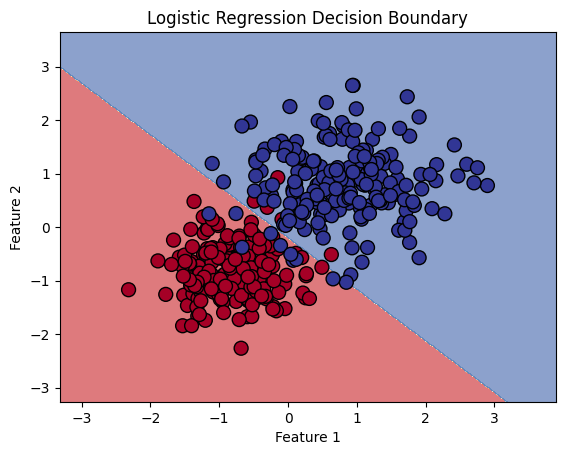

In [142]:
# Generate a meshgrid of points for plotting the decision boundary
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Standardise the meshgrid points using the same scaler
meshgrid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict the class labels for the meshgrid points
Z = logreg_model.predict(meshgrid_points)
# Reshape the predictions to match the shape of the meshgrid
Z = Z.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, cmap='RdYlBu', alpha=0.6)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='RdYlBu', edgecolor='k', s=100)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()